In [ ]:
'''
Calcular a extincao atmosferica

1 - Usar imagens da noite 2021-08-13 (landolt 110 229 - http://james.as.arizona.edu/~psmith/charts/c116.html)
2 - Reduzir imagens (scripts cl de preparacao e reducao com iraf salvos no google drive)
3 - Fazer fotometria de abertura (noao - digiphot - apphot - qphot) com diferentes aberturas e determinar a melhor (7.5)
4 - Extrair resultados (nome da imagem, filtro, data, altura, abertura, magnitude, erro de magnitude e massa de ar)  com tasks  Fields (1,5,6) e txdump
5 - Ajuste linear pra determinar  coef. de extincao (massa de ar x mag instrumental)
'''

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import simple_norm


from astropy.io import fits

In [ ]:
#ler arquivos salvos no google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#entrando na pasta do ON e setando path
!cd 'gdrive/MyDrive/ON/'
path_ON = 'gdrive/MyDrive/ON/'

In [ ]:
#exemplo de imagem reduzida
image = path_ON+'calibradas/S_110229_15s_b2x2-0001_R.fit'
fits.info(image)

Filename: gdrive/MyDrive/ON/calibradas/S_110229_15s_b2x2-0001_R.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (1024, 1024)   float32   


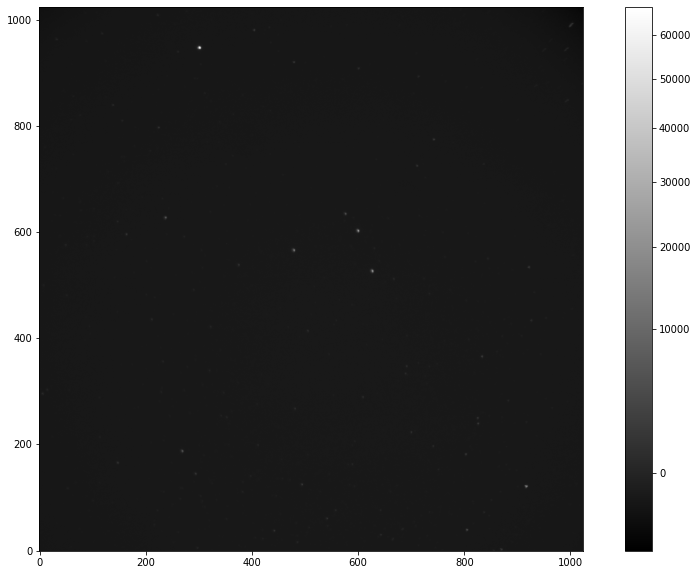

In [ ]:
#exemplo de imagem reduzida
image_data= fits.getdata(image, ext=0)
# plt.imshow(image_data, cmap='gray',norm=LogNorm())
# plt.colorbar()

norm = simple_norm(image_data, 'sqrt')

# Display the image
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(image_data, origin='lower', norm=norm, cmap='gray')
fig.colorbar(im)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Text(0.5, 0, 'aperture (pixel)')

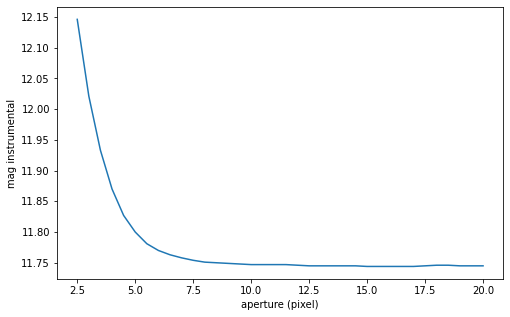

In [ ]:
best_aperture = pd.read_csv(path_ON+'fields.dat',
                            header=None,
                            sep='  ',
                            names=['aperture','mag','merr'])

plt.figure(figsize=(8,5))
plt.plot(best_aperture.aperture,best_aperture.mag)
plt.ylabel('mag instrumental')
plt.xlabel('aperture (pixel)')

In [ ]:
df_qphot = pd.read_csv(path_ON+'qphot.dat',
                       header=0,
                       sep=',')
df_qphot

,IMAGE,XAIRMASS,RAPERT,MAG,MERR
0,S_110229_15s_b2x2-0001_,1.058722,7.5,14.695,0.003
1,S_110229_15s_b2x2-0002_,1.059132,7.5,14.694,0.003
2,S_110229_15s_b2x2-0003_,1.059541,7.5,14.691,0.003
3,S_110229_15s_b2x2-0004_,1.059955,7.5,14.697,0.003
4,S_110229_15s_b2x2-0005_,1.252859,7.5,14.782,0.003
5,S_110229_15s_b2x2-0006_,1.254003,7.5,14.802,0.003
6,S_110229_15s_b2x2-0007_,1.255151,7.5,15.485,0.004
7,S_110229_15s_b2x2-0008_,1.256303,7.5,14.918,0.003
8,S_110229_15s_b2x2-0009_,1.645592,7.5,14.864,0.003
9,S_110229_15s_b2x2-0010_,1.648230,7.5,14.867,0.003


In [ ]:
df_hselect = pd.read_csv(path_ON+'hselect.dat',
                         header=None,
                         sep=',',
                         names=['image','date-obs','exptime','filter','objctalt','airmass'])
df_hselect

,image,date-obs,exptime,filter,objctalt,airmass
0,S_110229_15s_b2x2-0001_R.fit,2021-08-14T00:54:23.28,15.0,R,70.7416,1.058722
1,S_110229_15s_b2x2-0002_R.fit,2021-08-14T00:54:40.51,15.0,R,70.6801,1.059132
2,S_110229_15s_b2x2-0003_R.fit,2021-08-14T00:54:57.66,15.0,R,70.6163,1.059541
3,S_110229_15s_b2x2-0004_R.fit,2021-08-14T00:55:14.90,15.0,R,70.5525,1.059955
4,S_110229_15s_b2x2-0005_R.fit,2021-08-14T02:10:27.80,15.0,R,52.8312,1.252859
5,S_110229_15s_b2x2-0006_R.fit,2021-08-14T02:10:44.96,15.0,R,52.7632,1.254003
6,S_110229_15s_b2x2-0007_R.fit,2021-08-14T02:11:02.12,15.0,R,52.6943,1.255151
7,S_110229_15s_b2x2-0008_R.fit,2021-08-14T02:11:19.28,15.0,R,52.6247,1.256303
8,S_110229_15s_b2x2-0009_R.fit,2021-08-14T03:14:09.66,15.0,R,37.2565,1.645592
9,S_110229_15s_b2x2-0010_R.fit,2021-08-14T03:14:26.83,15.0,R,37.1858,1.648230


In [ ]:
df_join = df_hselect.join(df_qphot)

df_join.rename(columns={'merr  ':'merr'},inplace=True)\
       .drop(['IMAGE','XAIRMASS'], axis=1, inplace=True)\
       .columns = df_join.columns.str.lower()

df_join

,image,date-obs,exptime,filter,objctalt,airmass,rapert,mag,merr
0,S_110229_15s_b2x2-0001_R.fit,2021-08-14T00:54:23.28,15.0,R,70.7416,1.058722,7.5,14.695,0.003
1,S_110229_15s_b2x2-0002_R.fit,2021-08-14T00:54:40.51,15.0,R,70.6801,1.059132,7.5,14.694,0.003
2,S_110229_15s_b2x2-0003_R.fit,2021-08-14T00:54:57.66,15.0,R,70.6163,1.059541,7.5,14.691,0.003
3,S_110229_15s_b2x2-0004_R.fit,2021-08-14T00:55:14.90,15.0,R,70.5525,1.059955,7.5,14.697,0.003
4,S_110229_15s_b2x2-0005_R.fit,2021-08-14T02:10:27.80,15.0,R,52.8312,1.252859,7.5,14.782,0.003
5,S_110229_15s_b2x2-0006_R.fit,2021-08-14T02:10:44.96,15.0,R,52.7632,1.254003,7.5,14.802,0.003
6,S_110229_15s_b2x2-0007_R.fit,2021-08-14T02:11:02.12,15.0,R,52.6943,1.255151,7.5,15.485,0.004
7,S_110229_15s_b2x2-0008_R.fit,2021-08-14T02:11:19.28,15.0,R,52.6247,1.256303,7.5,14.918,0.003
8,S_110229_15s_b2x2-0009_R.fit,2021-08-14T03:14:09.66,15.0,R,37.2565,1.645592,7.5,14.864,0.003
9,S_110229_15s_b2x2-0010_R.fit,2021-08-14T03:14:26.83,15.0,R,37.1858,1.648230,7.5,14.867,0.003


In [ ]:
data = {
        'images':
        [
            list(df_join[:4].image),
            list(df_join[4:8].image),
            list(df_join[8:12].image)
        ],
        'mag_mean':
        [
            df_join[:4].mag.mean(),
            df_join[4:8].mag.mean(),
            df_join[8:12].mag.mean()
        ],
        'merr_mean':
        [
            df_join[:4].merr.mean(),
            df_join[4:8].merr.mean(),
            df_join[8:12].merr.mean()
        ],
        'airmass_mean':
        [
            df_join[:4].airmass.mean(),
            df_join[4:8].airmass.mean(),
            df_join[8:12].airmass.mean()
        ],
        'objctalt_mean':
        [
            df_join[:4].objctalt.mean(),
            df_join[4:8].objctalt.mean(),
            df_join[8:12].objctalt.mean()
        ]
      }


df_mean = pd.DataFrame(data)
df_mean

,images,mag_mean,merr_mean,airmass_mean,objctalt_mean
0,"[S_110229_15s_b2x2-0001_R.fit, S_110229_15s_b2...",14.69425,0.00300,1.059337,70.647625
1,"[S_110229_15s_b2x2-0005_R.fit, S_110229_15s_b2...",14.99675,0.00325,1.254579,52.728350
2,"[S_110229_15s_b2x2-0009_R.fit, S_110229_15s_b2...",14.86600,0.00300,1.649564,37.150475


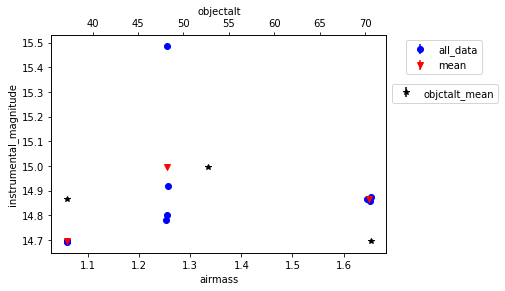

In [ ]:
fig, ax1, = plt.subplots()

ax1.errorbar(df_join.airmass,df_join.mag,yerr=df_join.merr,fmt='o',label='all_data',color='blue')
# ax1.errorbar(df_join.objctalt,df_join.mag,yerr=df_join.merr,fmt='v',label='objctalt',color='brown')
ax1.errorbar(df_mean.airmass_mean,df_mean.mag_mean,yerr=df_mean.merr_mean,fmt='v',color='r',label='mean')

ax1.set_xlabel('airmass')
ax1.set_ylabel('instrumental_magnitude')
ax1.legend(loc='center right',bbox_to_anchor=(1.3, 0.9))

ax2 = ax1.twiny()
ax2.errorbar(df_mean.objctalt_mean,df_mean.mag_mean,yerr=df_mean.merr_mean,fmt='*',color='black',label='objctalt_mean')
ax2.set_xlabel(r'objectalt')
ax2.legend(loc='best',bbox_to_anchor=(1.35, 0.8))

# fig.tight_layout()

plt.show()


m0: 14.587400416206012, m0_err: 0.6221414113419027, k_R: 0.2005304943041523


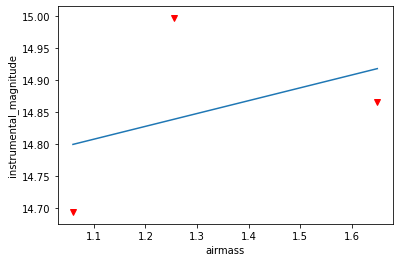

In [ ]:
result = stats.linregress(df_mean.airmass_mean, df_mean.mag_mean)
print(r'm0: {}, m0_err: {}, k_R: {}'.format(result.intercept, result.intercept_stderr,result.slope))

plt.errorbar(df_mean.airmass_mean,df_mean.mag_mean,yerr=df_mean.merr_mean,fmt='v',color='r',label='mean')

x = df_mean.airmass_mean
y = result.slope*df_mean.airmass_mean+result.intercept

plt.xlabel('airmass')
plt.ylabel('instrumental_magnitude')
plt.plot(x,y)